<a href="https://colab.research.google.com/github/zapfruit/Low-Light-Image-Enhancement-using-CLAHE/blob/main/image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!dir

drive  sample_data


In [ ]:
image_path = '/content/drive/MyDrive/hazy.png'
image = cv2.imread(image_path)
n=1

clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(n, n))



In [ ]:
def apply_clahe(image):
    # Converting the image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Applying CLAHE on the L channel
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(n, n))
    lab[:, :, 0] = clahe.apply(lab[:, :, 0])

    # Convert the image back to BGR color space
    enhanced_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    return enhanced_image

def apply_rgb_method(image):
    # Splitting the image into color channels
    b, g, r = cv2.split(image)

    # Applying desired operations to each channel (e.g., contrast stretching, histogram equalization)
    b = cv2.equalizeHist(b)
    g = cv2.equalizeHist(g)
    r = cv2.equalizeHist(r)

    # Merging the enhanced color channels back into an image
    enhanced_image = cv2.merge((b, g, r))

    return enhanced_image



Original image


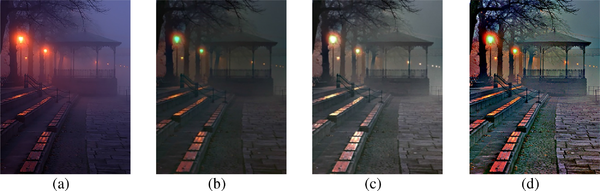

Modified Image


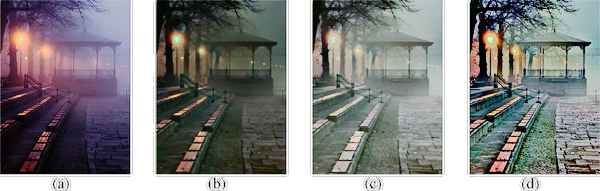

In [ ]:
from google.colab.patches import cv2_imshow

# Reading and preprocess the image
image_path = '/content/drive/MyDrive/hazy.png'
image = cv2.imread(image_path)
# Preprocessing steps if necessary

# Applying CLAHE
image_clahe = apply_clahe(image)

# Applying RGB method
image_enhanced = apply_rgb_method(image_clahe)

# Checking if the enhanced image is not empty
if image_enhanced is not None and len(image_enhanced) > 0:


    output_path = '/content/drive/MyDrive/processed_imgs/output.png'
    cv2.imwrite(output_path, image_enhanced)


    #displaying the result image
    print("Original image")
    cv2_imshow(image)
    print("Modified Image")
    cv2_imshow(image_enhanced)

else:
    print("Error: The processed image is empty.")
